In [2]:
import os, math, sys
import pandas as pd
import pandapower as pp
import numpy as np

from pandapower.file_io import from_json, to_json

main_dir = os.path.abspath(os.path.join(os.path.abspath(""), ".."))
data_dir = 'Modified_116_LV_CSV'

if main_dir not in sys.path:
    sys.path.insert(0, main_dir)

print(sys.path)

from create_basic_network import debug_result, hc_violation

load C:\Users\vitor\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\ortools\.libs\zlib1.dll...
load C:\Users\vitor\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\ortools\.libs\abseil_dll.dll...
load C:\Users\vitor\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\ortools\.libs\utf8_validity.dll...
load C:\Users\vitor\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\ortools\.libs\re2.dll...
load C:\Users\vitor\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\ortools\.libs\libprotobuf.dll...
load C:\Users\vitor\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python31

In [3]:
net = from_json(os.path.join(main_dir, 'json_networks', 'no_load_network.json'))
net45 = from_json(os.path.join(main_dir, 'json_networks', '45_loads_network.json'))
net48 = from_json(os.path.join(main_dir, 'json_networks', '48_loads_network.json'))
net_far = from_json(os.path.join(main_dir, 'json_networks', 'farthest_load_network.json'))

print(hc_violation(net), hc_violation(net45), hc_violation(net48), hc_violation(net_far))

True True True True


In [12]:
pp.runpp_3ph(net, max_iteration=100, tolerance_mva=1e-8, calculate_voltage_angles=True)
pp.runpp_3ph(net45, max_iteration=100, tolerance_mva=1e-8, calculate_voltage_angles=True)
pp.runpp_3ph(net48, max_iteration=100, tolerance_mva=1e-8, calculate_voltage_angles=True)
pp.runpp_3ph(net_far, max_iteration=100, tolerance_mva=1e-8, calculate_voltage_angles=True)

In [13]:
print((net.res_bus_3ph.loc[:, ['p_a_mw', 'p_b_mw', 'p_c_mw']] > 0).sum())
net.res_bus_3ph.loc[:, ['vm_a_pu', 'vm_b_pu', 'vm_c_pu', 'p_a_mw', 'p_b_mw', 'p_c_mw']].describe()

p_a_mw    0
p_b_mw    0
p_c_mw    0
dtype: int64


,vm_a_pu,vm_b_pu,vm_c_pu,p_a_mw,p_b_mw,p_c_mw
count,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000
mean,1.050466,1.050466,1.050466,-0.000031,-0.000031,-0.000031
std,0.000043,0.000043,0.000043,0.000340,0.000340,0.000340
min,1.050000,1.050000,1.050000,-0.003679,-0.003679,-0.003679
25%,1.050470,1.050470,1.050470,0.000000,0.000000,0.000000
50%,1.050470,1.050470,1.050470,0.000000,0.000000,0.000000
75%,1.050470,1.050470,1.050470,0.000000,0.000000,0.000000
max,1.050470,1.050470,1.050470,0.000000,0.000000,0.000000


In [14]:
print((net45.res_bus_3ph.loc[:, ['p_a_mw', 'p_b_mw', 'p_c_mw']] > 0).sum())
net45.res_bus_3ph.loc[:, ['vm_a_pu', 'vm_b_pu', 'vm_c_pu', 'p_a_mw', 'p_b_mw', 'p_c_mw']].describe()

p_a_mw    16
p_b_mw    15
p_c_mw    14
dtype: int64


,vm_a_pu,vm_b_pu,vm_c_pu,p_a_mw,p_b_mw,p_c_mw
count,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000
mean,1.085407,0.931751,1.109036,-0.000029,-0.000044,-0.000026
std,0.004414,0.011450,0.006077,0.001835,0.001908,0.001625
min,1.050095,0.925510,1.049983,-0.019353,-0.020191,-0.017096
25%,1.083442,0.928530,1.107557,0.000000,0.000000,0.000000
50%,1.084453,0.930108,1.109061,0.000000,0.000000,0.000000
75%,1.087741,0.932580,1.110815,0.000000,0.000000,0.000000
max,1.096019,1.049922,1.118685,0.001000,0.001000,0.001000


In [15]:
print((net48.res_bus_3ph.loc[:, ['p_a_mw', 'p_b_mw', 'p_c_mw']] > 0).sum())
net48.res_bus_3ph.loc[:, ['vm_a_pu', 'vm_b_pu', 'vm_c_pu', 'p_a_mw', 'p_b_mw', 'p_c_mw']].describe()

p_a_mw    17
p_b_mw    16
p_c_mw    15
dtype: int64


,vm_a_pu,vm_b_pu,vm_c_pu,p_a_mw,p_b_mw,p_c_mw
count,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000
mean,1.102185,0.916383,1.106210,-0.000027,-0.000048,-0.000026
std,0.005718,0.013077,0.005881,0.001910,0.002041,0.001710
min,1.050113,0.908782,1.049964,-0.020151,-0.021621,-0.018003
25%,1.101088,0.912767,1.104677,0.000000,0.000000,0.000000
50%,1.101483,0.914242,1.106247,0.000000,0.000000,0.000000
75%,1.104517,0.917763,1.107986,0.000000,0.000000,0.000000
max,1.113389,1.049923,1.116167,0.001000,0.001000,0.001000


In [10]:
print((net_far.res_bus_3ph.loc[:, ['p_a_mw', 'p_b_mw', 'p_c_mw']] > 0).sum())
net_far.res_bus_3ph.loc[:, ['vm_a_pu', 'vm_b_pu', 'vm_c_pu', 'p_a_mw', 'p_b_mw', 'p_c_mw']].describe()

p_a_mw    1
p_b_mw    0
p_c_mw    0
dtype: int64


,vm_a_pu,vm_b_pu,vm_c_pu,p_a_mw,p_b_mw,p_c_mw
count,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000
mean,1.013862,1.016637,1.123956,-0.000029,-0.000032,-0.000034
std,0.003448,0.003112,0.006898,0.000416,0.000349,0.000364
min,1.011682,1.016107,1.050020,-0.004384,-0.003775,-0.003935
25%,1.013167,1.016274,1.124438,0.000000,0.000000,0.000000
50%,1.013713,1.016325,1.124545,0.000000,0.000000,0.000000
75%,1.014050,1.016409,1.124718,0.000000,0.000000,0.000000
max,1.049993,1.049987,1.125066,0.001000,0.000000,0.000000


Text(0.5, 1.0, 'Line Resistance')

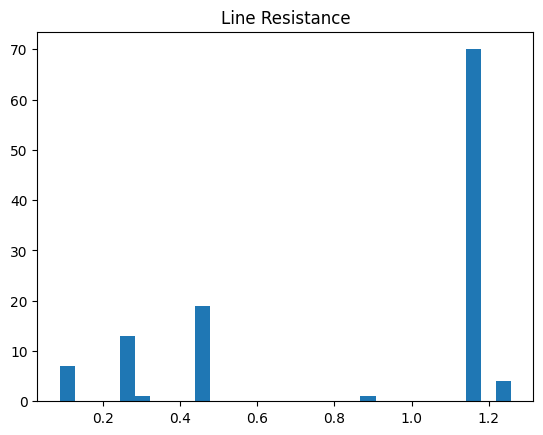

In [11]:
import matplotlib.pyplot as plt
plt.hist(net.line.r_ohm_per_km, bins=30); plt.title("Line Resistance")
